In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score


In [184]:
#Load dataset
df = pd.read_csv("youtube_data.csv")
df.head()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail
0,gsJAlLOFBv0,TINY Tech That Actually Works,No description available,2025-05-02T17:37:10Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['tiny', 'tech', 'gadgets', 'small', 'miniature']",28,8962092.0,243350.0,515.0,PT57S,https://i.ytimg.com/vi/gsJAlLOFBv0/default.jpg
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,PT7M50S,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,PT47S,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08T18:04:31Z,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,PT31S,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22T16:49:00Z,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,PT16S,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg


In [185]:
#Let's describe the dataset
print("_________________________________________________")
print(df.describe())
print("_________________________________________________")
print("Shape of the dataset:", df.shape)
print("_________________________________________________")
print(df.info())
print("_________________________________________________")

_________________________________________________
       category_id    view_count    like_count  comment_count
count   600.000000  6.000000e+02  6.000000e+02     600.000000
mean     24.903333  8.080299e+06  2.174646e+05    1970.144781
std       4.863477  2.455377e+07  5.074207e+05    4421.455908
min       1.000000  3.120000e+02  0.000000e+00       0.000000
25%      22.000000  8.150100e+04  1.646000e+03      13.000000
50%      27.000000  9.587180e+05  2.214900e+04     252.500000
75%      28.000000  5.991357e+06  2.174646e+05    1802.500000
max      30.000000  3.437590e+08  4.421091e+06   40241.000000
_________________________________________________
Shape of the dataset: (600, 13)
_________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        600 non-null    object 
 1   title          

Data Cleaning & Feature Engineering

In [186]:
#let's  delete if any duplicate value exists 
df.drop_duplicates(inplace=True)    

In [187]:
#Let's work on published date
df['published_date'] = pd.to_datetime(df['published_date'], format='ISO8601')
df.head()


,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail
0,gsJAlLOFBv0,TINY Tech That Actually Works,No description available,2025-05-02 17:37:10+00:00,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['tiny', 'tech', 'gadgets', 'small', 'miniature']",28,8962092.0,243350.0,515.0,PT57S,https://i.ytimg.com/vi/gsJAlLOFBv0/default.jpg
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18 12:39:53+00:00,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,PT7M50S,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01 11:00:06+00:00,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,PT47S,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08 18:04:31+00:00,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,PT31S,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22 16:49:00+00:00,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,PT16S,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg


In [188]:
#adding time duration and hours
df['hours'] = df['published_date'].dt.hour
df['duration'] = pd.to_timedelta(df['duration'])
df['duration_seconds'] = df['duration'].dt.total_seconds()

In [189]:
#tags split and a new column for tags
df['tag'] = df['tags'].apply(lambda x: x.replace("'",''))
df['tag'] = df['tag'].apply(lambda x: x.replace('[',''))
df['tag'] = df['tag'].apply(lambda x: x.replace(']',''))

In [190]:
#let's get all the gtags in a dictionary
tags ={
    
}
for i in df['tag']:
    for j in i.split(','):
       tag = j.lower().strip()
       if tag in tags: 
           tags[tag] = tags[tag]+1
       else:
           tags[tag] = 1 

In [191]:
#Get the top 30 tags
tags_df = pd.DataFrame.from_dict(tags,orient='index',columns=['count'])
tags_df = tags_df.reset_index().rename(columns={'index': 'tag'})
tags_df = tags_df.sort_values('count',ascending=False).head(30)
tags_df

,tag,count
27,travel,491
29,asia,490
34,animal,246
30,elephant,245
31,bangkok,245
32,elephantnature,245
33,asian,245
35,wildlife,245
36,chiang,245
37,african,245


EDA

C:\Users\pande\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pande\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pande\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pande\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pande\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: G

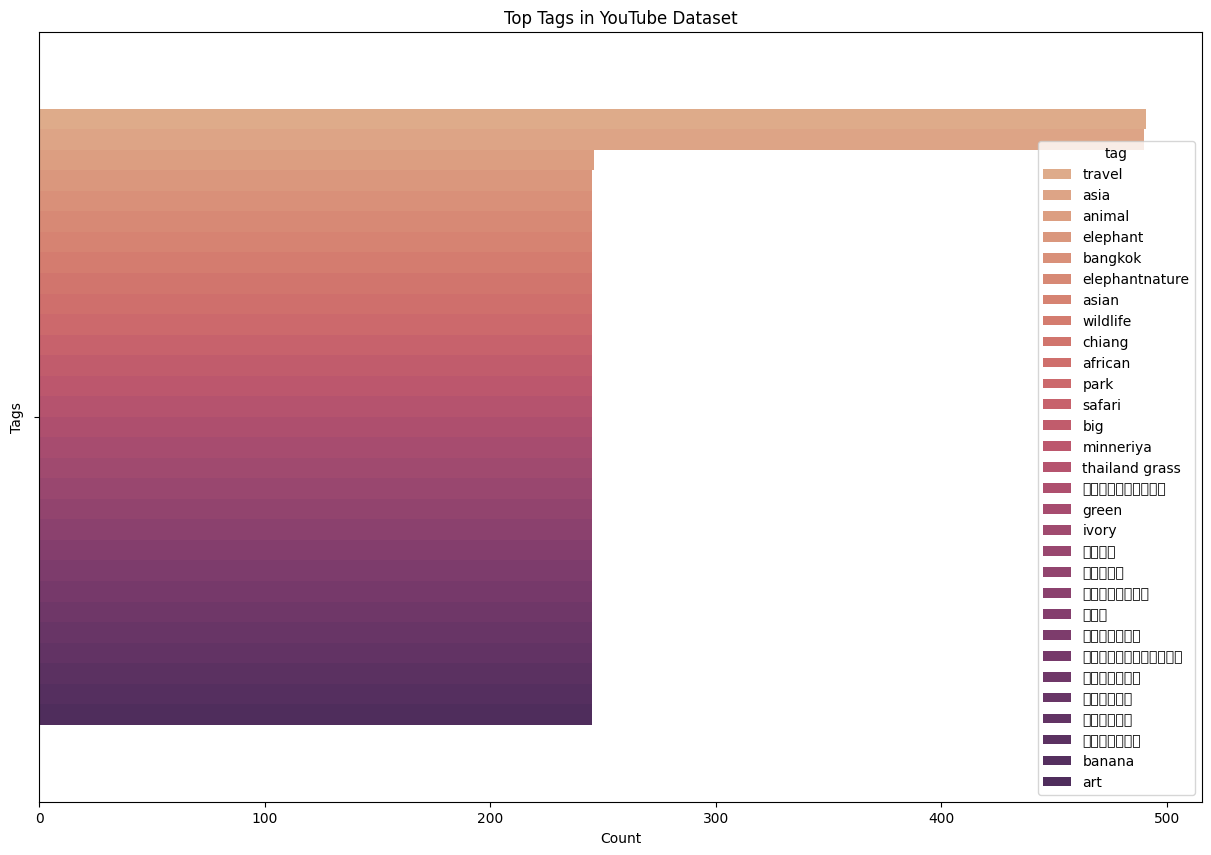

In [192]:
#tags and their count
plt.figure(figsize=(15, 10))
sns.barplot(x='count', hue = 'tag', data=tags_df, palette='flare')
plt.title('Top Tags in YouTube Dataset')
plt.xlabel('Count')
plt.ylabel('Tags')
plt.show()

In [193]:
df.columns

Index(['video_id', 'title', 'description', 'published_date', 'channel_id',
       'channel_title', 'tags', 'category_id', 'view_count', 'like_count',
       'comment_count', 'duration', 'thumbnail', 'hours', 'duration_seconds',
       'tag'],
      dtype='object')

In [194]:
#let's define categories and their mean values
categgory_views = df.groupby('category_id')['view_count'].mean(round(2)).sort_values(ascending=False)
category_likes = df.groupby('category_id')['like_count'].mean(round(2)).sort_values(ascending=False)
category_comments = df.groupby('category_id')['comment_count'].mean(round(2)).sort_values(ascending=False)

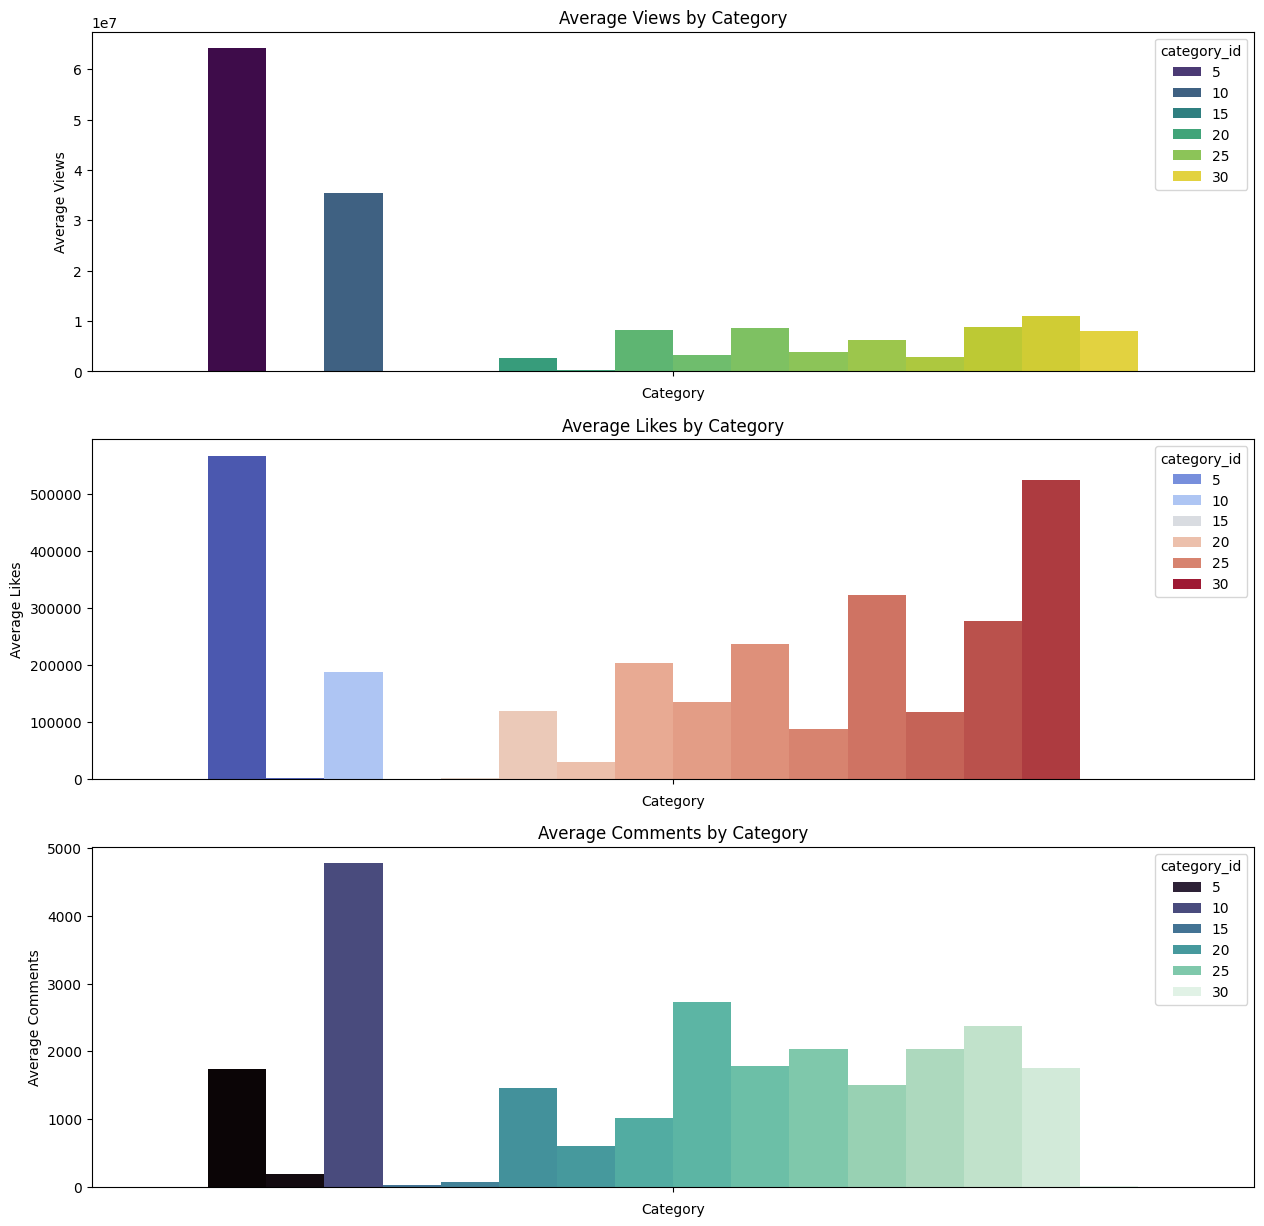

In [195]:
#Subplots for category views, likes, and comments
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

sns.barplot(hue=categgory_views.index, y=categgory_views.values, palette='viridis', ax=axes[0])
axes[0].set_title('Average Views by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Average Views')

sns.barplot(hue=category_likes.index, y=category_likes.values, palette='coolwarm', ax=axes[1])
axes[1].set_title('Average Likes by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Average Likes')

sns.barplot(hue=category_comments.index, y=category_comments.values, palette='mako', ax=axes[2])
axes[2].set_title('Average Comments by Category')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Average Comments')


plt.show()


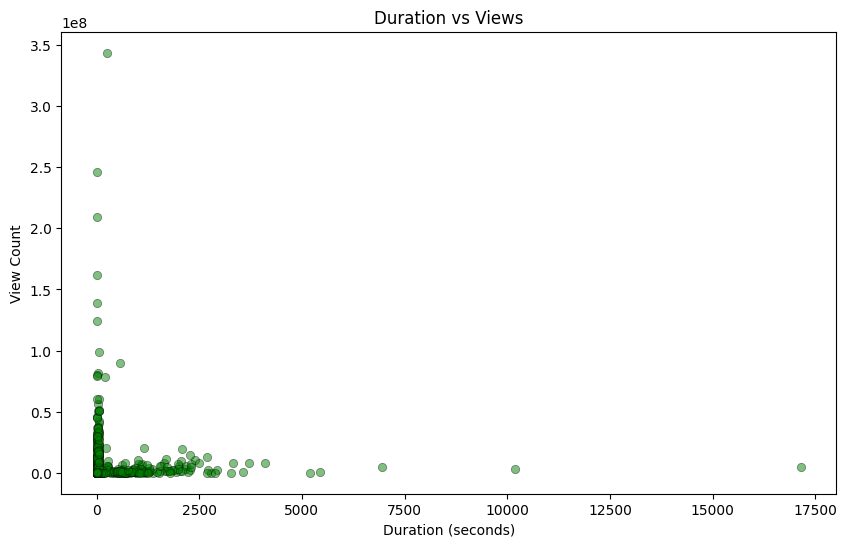

In [196]:
#let's see how duration affects the views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=df, alpha=0.5, color = 'green',  edgecolor='black')
plt.title('Duration vs Views')
plt.xlabel('Duration (seconds)')
plt.ylabel('View Count')
plt.show()

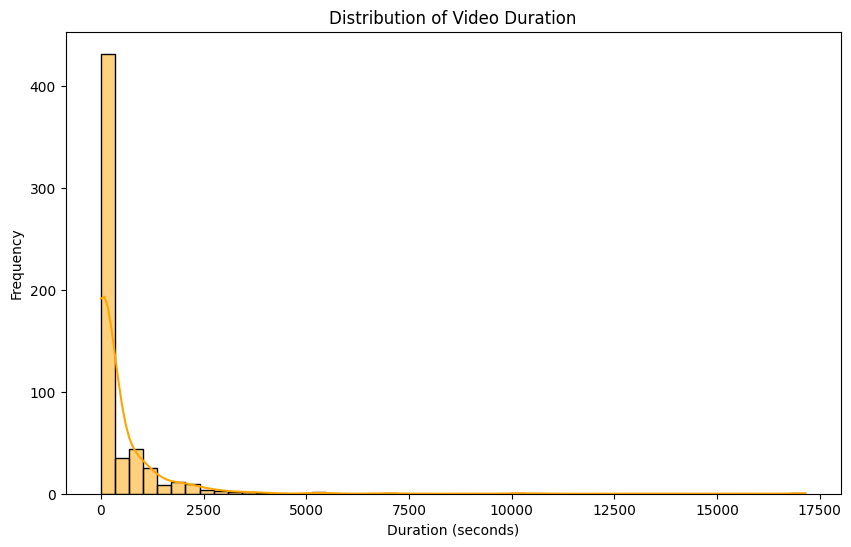

In [197]:
#distribution of duration
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_seconds'], bins=50, kde=True, color='orange')
plt.title('Distribution of Video Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

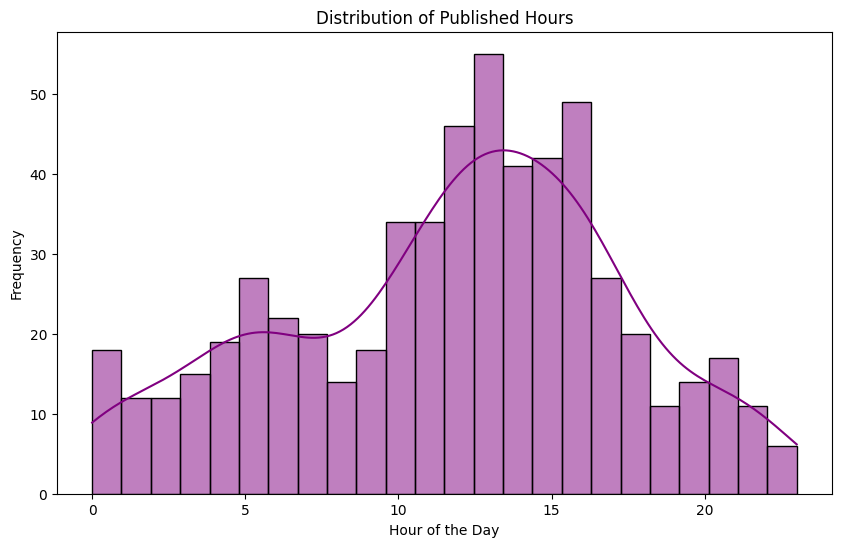

In [198]:
#distribution of published hours
plt.figure(figsize=(10, 6))
sns.histplot(df['hours'], bins=24, kde=True, color='purple')
plt.title('Distribution of Published Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

Prediction

In [199]:
#Let's predict views using likea, comments, duration and tags
X = df[['like_count', 'comment_count', 'duration_seconds']]
y = df['view_count']

In [200]:
#let's split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
#numerical and categorical features
numerical_features = ['like_count', 'comment_count', 'duration_seconds']

In [202]:
#let's scale the data
scaler = StandardScaler()

#let's scale the training data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

#let's scale the test data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [203]:
#let's make the model
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [220]:
predictionsLR = modelLR.predict(X_test)

#let's evaluate the model
r2LR = r2_score(y_test, predictionsLR)
print(f"R-squared: {r2LR:.2f}")
#let's check the mean squared error
mseLR = mean_squared_error(y_test, predictionsLR)
print(f"Mean Squared Error: {mseLR:.2f}")
rmseLR = np.sqrt(mseLR)
print(f"Root Mean Squared Error: {rmseLR:.2f}")

R-squared: 0.51
Mean Squared Error: 396319154186169.12
Root Mean Squared Error: 19907766.18


In [215]:
#Random Forest Model
modelRF = RandomForestRegressor(random_state=42)
modelRF.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [219]:
#make predictions
predictionsRF = modelRF.predict(X_test)

#Evaluate the model
r2RF = r2_score(y_test, predictionsRF)
print(f"R-squared (Random Forest): {r2RF:.2f}")
mseRF = mean_squared_error(y_test, predictionsRF)
print(f"Mean Squared Error (Random Forest): {mseRF:.2f}")
rmseRF = np.sqrt(mseRF)
print(f"Root Mean Squared Error (Random Forest): {rmseRF:.2f}")

R-squared (Random Forest): 0.68
Mean Squared Error (Random Forest): 259536777154403.78
Root Mean Squared Error (Random Forest): 16110145.16


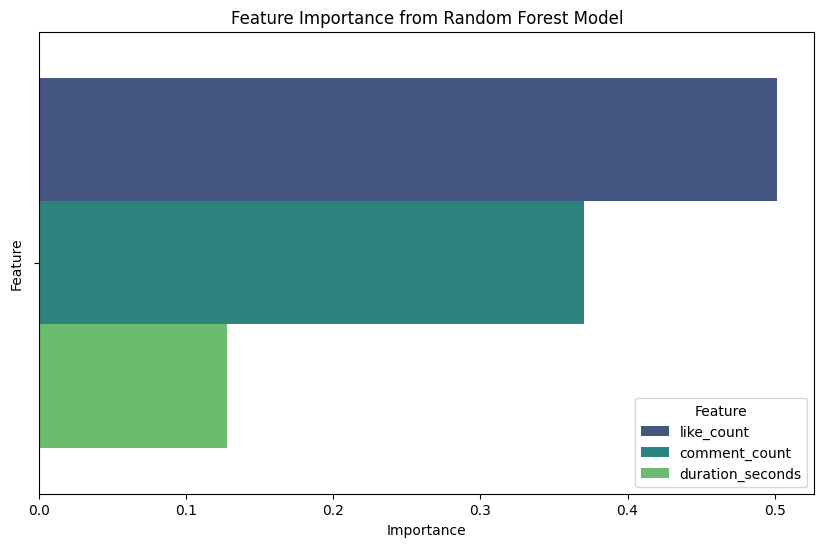

In [217]:
#let's check the feature importance
feature_importances = modelRF.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', hue='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()